In [1]:
# import Library yang dibutuhkan
import pandas as pd                   #dataframe manipulation
import numpy as np                    #scientific camputing
import seaborn as sns                 #visualization
import matplotlib.pyplot as plt       #visualization
%matplotlib inline
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [40]:
# import csv
am = pd.read_csv("C:/Users/HP/Desktop/Data Amazon/Amazon_sales.csv") 

In [5]:
am.head()

,ID,name,rating,reviewCount,price,isBestSeller,quantity,categoryName,city,country
0,B083K77PZL,"W-KING Bluetooth Speaker, 50W Speakers Wireles...",4.6,2979,65.59,False,200,Hi-Fi Speakers,Manchester,UK
1,B09J47Y789,XSOUND Portable Bluetooth Speaker Wireless 24W...,4.4,804,22.99,False,200,Hi-Fi Speakers,Manchester,UK
2,B08FCDFHLB,"soundcore Anker Mini 3 Bluetooth Speaker, Bass...",4.7,3208,34.99,False,200,Hi-Fi Speakers,Manchester,UK
3,B096TJ6FXD,"HEYSONG Shower Speaker, Waterpoof Portable Blu...",4.3,1279,21.99,False,100,Hi-Fi Speakers,Edinburgh,UK
4,B08ZJ6DQNY,Sony SRS-XB13 Wireless Extra Bass Portable Com...,4.3,15963,39.90,False,100,Hi-Fi Speakers,Leeds,UK


In [42]:
''' Akan di-generate Sales untuk Jan 2023 - Nov 2024 '''

# Keterangan table sebagai Sales Dec 2024
am['date'] = pd.to_datetime('2024-12', format='%Y-%m') #dengan format datetime

am.head()

,ID,name,rating,reviewCount,price,isBestSeller,quantity,categoryName,city,country,date
0,B083K77PZL,"W-KING Bluetooth Speaker, 50W Speakers Wireles...",4.6,2979,65.59,False,200,Hi-Fi Speakers,Manchester,UK,2024-12-01
1,B09J47Y789,XSOUND Portable Bluetooth Speaker Wireless 24W...,4.4,804,22.99,False,200,Hi-Fi Speakers,Manchester,UK,2024-12-01
2,B08FCDFHLB,"soundcore Anker Mini 3 Bluetooth Speaker, Bass...",4.7,3208,34.99,False,200,Hi-Fi Speakers,Manchester,UK,2024-12-01
3,B096TJ6FXD,"HEYSONG Shower Speaker, Waterpoof Portable Blu...",4.3,1279,21.99,False,100,Hi-Fi Speakers,Edinburgh,UK,2024-12-01
4,B08ZJ6DQNY,Sony SRS-XB13 Wireless Extra Bass Portable Com...,4.3,15963,39.90,False,100,Hi-Fi Speakers,Leeds,UK,2024-12-01


In [19]:
# Cek tipe data
am.dtypes

ID                      object
name                    object
rating                 float64
reviewCount              int64
price                  float64
isBestSeller              bool
quantity                 int64
categoryName            object
city                    object
country                 object
date            datetime64[ns]
dtype: object

In [44]:
# Drop kolom yang tidak perlu
am = am.drop(columns=['rating', 'reviewCount', 'isBestSeller'])

am.head()

,ID,name,price,quantity,categoryName,city,country,date
0,B083K77PZL,"W-KING Bluetooth Speaker, 50W Speakers Wireles...",65.59,200,Hi-Fi Speakers,Manchester,UK,2024-12-01
1,B09J47Y789,XSOUND Portable Bluetooth Speaker Wireless 24W...,22.99,200,Hi-Fi Speakers,Manchester,UK,2024-12-01
2,B08FCDFHLB,"soundcore Anker Mini 3 Bluetooth Speaker, Bass...",34.99,200,Hi-Fi Speakers,Manchester,UK,2024-12-01
3,B096TJ6FXD,"HEYSONG Shower Speaker, Waterpoof Portable Blu...",21.99,100,Hi-Fi Speakers,Edinburgh,UK,2024-12-01
4,B08ZJ6DQNY,Sony SRS-XB13 Wireless Extra Bass Portable Com...,39.90,100,Hi-Fi Speakers,Leeds,UK,2024-12-01


In [46]:
# Simpan sebagai CSV
am.to_csv("C:/Users/HP/Desktop/Data Amazon/Amazon Sales Dated/amz_Dec24.csv", index=False)

In [32]:
am['quantity'].value_counts()

quantity
50     147984
100     93914
200     35724
300     18611
400     11693
1           1
Name: count, dtype: int64

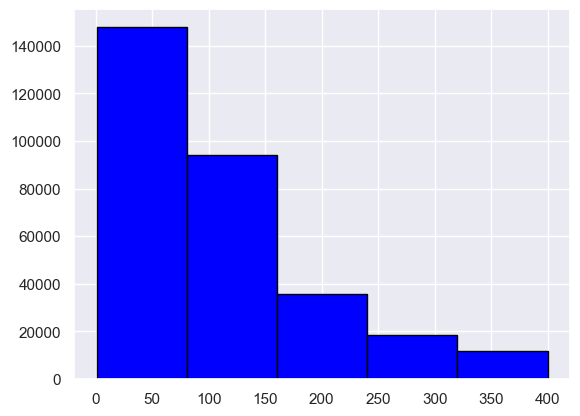

In [34]:
plt.hist(am['quantity'], bins=5, color='blue', edgecolor='black')
plt.show()

In [54]:
''' Akan di-generate Sales untuk Nov 2024 '''
# Dibuat randomnessnya mirip distribusi awal (Dec 24)

# Distribusi Dec 24
values = [50, 100, 200, 300, 400]
frequencies = [147984, 93914, 35724, 18611, 11693]

# Hitung probabilitas (frekuensi dibagi total)
probabilities = [freq / sum(frequencies) for freq in frequencies]

# Buat dataframe copy
nov24 = am.copy()

# Generate kolom quantity baru 
nov24['quantity'] = np.random.choice(values, size=len(nov24), p=probabilities)

nov24['quantity'].value_counts()

quantity
50     147585
100     94075
200     35963
300     18536
400     11768
Name: count, dtype: int64

In [56]:
nov24.head()

,ID,name,price,quantity,categoryName,city,country,date
0,B083K77PZL,"W-KING Bluetooth Speaker, 50W Speakers Wireles...",65.59,100,Hi-Fi Speakers,Manchester,UK,2024-12-01
1,B09J47Y789,XSOUND Portable Bluetooth Speaker Wireless 24W...,22.99,100,Hi-Fi Speakers,Manchester,UK,2024-12-01
2,B08FCDFHLB,"soundcore Anker Mini 3 Bluetooth Speaker, Bass...",34.99,50,Hi-Fi Speakers,Manchester,UK,2024-12-01
3,B096TJ6FXD,"HEYSONG Shower Speaker, Waterpoof Portable Blu...",21.99,50,Hi-Fi Speakers,Edinburgh,UK,2024-12-01
4,B08ZJ6DQNY,Sony SRS-XB13 Wireless Extra Bass Portable Com...,39.90,100,Hi-Fi Speakers,Leeds,UK,2024-12-01


In [58]:
''' Nov 24 berhasil, kita generate sisanya Jan 23 - Oct 24 '''

# Buat dataframe copy
jan23 = am.copy()
feb23 = am.copy()
mar23 = am.copy()
apr23 = am.copy()
may23 = am.copy()
jun23 = am.copy()
jul23 = am.copy()
aug23 = am.copy()
sep23 = am.copy()
oct23 = am.copy()
nov23 = am.copy()
dec23 = am.copy()
jan24 = am.copy()
feb24 = am.copy()
mar24 = am.copy()
apr24 = am.copy()
may24 = am.copy()
jun24 = am.copy()
jul24 = am.copy()
aug24 = am.copy()
sep24 = am.copy()
oct24 = am.copy()


# Generate kolom quantity baru 
jan23['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
feb23['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
mar23['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
apr23['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
may23['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
jun23['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
jul23['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
aug23['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
sep23['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
oct23['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
nov23['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
dec23['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
jan24['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
feb24['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
mar24['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
apr24['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
may24['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
jun24['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
jul24['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
aug24['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
sep24['quantity'] = np.random.choice(values, size=len(am), p=probabilities)
oct24['quantity'] = np.random.choice(values, size=len(am), p=probabilities)


aug23.head()

,ID,name,price,quantity,categoryName,city,country,date
0,B083K77PZL,"W-KING Bluetooth Speaker, 50W Speakers Wireles...",65.59,100,Hi-Fi Speakers,Manchester,UK,2024-12-01
1,B09J47Y789,XSOUND Portable Bluetooth Speaker Wireless 24W...,22.99,50,Hi-Fi Speakers,Manchester,UK,2024-12-01
2,B08FCDFHLB,"soundcore Anker Mini 3 Bluetooth Speaker, Bass...",34.99,400,Hi-Fi Speakers,Manchester,UK,2024-12-01
3,B096TJ6FXD,"HEYSONG Shower Speaker, Waterpoof Portable Blu...",21.99,50,Hi-Fi Speakers,Edinburgh,UK,2024-12-01
4,B08ZJ6DQNY,Sony SRS-XB13 Wireless Extra Bass Portable Com...,39.90,100,Hi-Fi Speakers,Leeds,UK,2024-12-01


In [65]:
# Ganti keterangan datenya jadi masing2 bulan
nov24['date'] = nov24['date'].apply(lambda x: x.replace(year=2024, month=11))

nov24.head()

,ID,name,price,quantity,categoryName,city,country,date
0,B083K77PZL,"W-KING Bluetooth Speaker, 50W Speakers Wireles...",65.59,100,Hi-Fi Speakers,Manchester,UK,2024-11-01
1,B09J47Y789,XSOUND Portable Bluetooth Speaker Wireless 24W...,22.99,100,Hi-Fi Speakers,Manchester,UK,2024-11-01
2,B08FCDFHLB,"soundcore Anker Mini 3 Bluetooth Speaker, Bass...",34.99,50,Hi-Fi Speakers,Manchester,UK,2024-11-01
3,B096TJ6FXD,"HEYSONG Shower Speaker, Waterpoof Portable Blu...",21.99,50,Hi-Fi Speakers,Edinburgh,UK,2024-11-01
4,B08ZJ6DQNY,Sony SRS-XB13 Wireless Extra Bass Portable Com...,39.90,100,Hi-Fi Speakers,Leeds,UK,2024-11-01


In [64]:
# Ganti keterangan datenya jadi masing2 bulan

jan23['date'] = jan23['date'].apply(lambda x: x.replace(year=2023, month=1))
feb23['date'] = feb23['date'].apply(lambda x: x.replace(year=2023, month=2))
mar23['date'] = mar23['date'].apply(lambda x: x.replace(year=2023, month=3))
apr23['date'] = apr23['date'].apply(lambda x: x.replace(year=2023, month=4))
may23['date'] = may23['date'].apply(lambda x: x.replace(year=2023, month=5))
jun23['date'] = jun23['date'].apply(lambda x: x.replace(year=2023, month=6))
jul23['date'] = jul23['date'].apply(lambda x: x.replace(year=2023, month=7))
aug23['date'] = aug23['date'].apply(lambda x: x.replace(year=2023, month=8))
sep23['date'] = sep23['date'].apply(lambda x: x.replace(year=2023, month=9))
oct23['date'] = oct23['date'].apply(lambda x: x.replace(year=2023, month=10))
nov23['date'] = nov23['date'].apply(lambda x: x.replace(year=2023, month=11))
dec23['date'] = dec23['date'].apply(lambda x: x.replace(year=2023, month=12))
jan24['date'] = jan24['date'].apply(lambda x: x.replace(year=2024, month=1))
feb24['date'] = feb24['date'].apply(lambda x: x.replace(year=2024, month=2))
mar24['date'] = mar24['date'].apply(lambda x: x.replace(year=2024, month=3))
apr24['date'] = apr24['date'].apply(lambda x: x.replace(year=2024, month=4))
may24['date'] = may24['date'].apply(lambda x: x.replace(year=2024, month=5))
jun24['date'] = jun24['date'].apply(lambda x: x.replace(year=2024, month=6))
jul24['date'] = jul24['date'].apply(lambda x: x.replace(year=2024, month=7))
aug24['date'] = aug24['date'].apply(lambda x: x.replace(year=2024, month=8))
sep24['date'] = sep24['date'].apply(lambda x: x.replace(year=2024, month=9))
oct24['date'] = oct24['date'].apply(lambda x: x.replace(year=2024, month=10))


aug23.head()

,ID,name,price,quantity,categoryName,city,country,date
0,B083K77PZL,"W-KING Bluetooth Speaker, 50W Speakers Wireles...",65.59,100,Hi-Fi Speakers,Manchester,UK,2023-08-01
1,B09J47Y789,XSOUND Portable Bluetooth Speaker Wireless 24W...,22.99,50,Hi-Fi Speakers,Manchester,UK,2023-08-01
2,B08FCDFHLB,"soundcore Anker Mini 3 Bluetooth Speaker, Bass...",34.99,400,Hi-Fi Speakers,Manchester,UK,2023-08-01
3,B096TJ6FXD,"HEYSONG Shower Speaker, Waterpoof Portable Blu...",21.99,50,Hi-Fi Speakers,Edinburgh,UK,2023-08-01
4,B08ZJ6DQNY,Sony SRS-XB13 Wireless Extra Bass Portable Com...,39.90,100,Hi-Fi Speakers,Leeds,UK,2023-08-01


In [68]:
# Gabungkan semua jadi 1 dataframe
amz_dated = pd.concat([jan23, feb23, mar23, apr23, may23, jun23, jul23, aug23, sep23, oct23, nov23, dec23,
                      jan24, feb24, mar24, apr24, may24, jun24, jul24, aug24, sep24, oct24, nov24, am], ignore_index=True)

amz_dated.head()

,ID,name,price,quantity,categoryName,city,country,date
0,B083K77PZL,"W-KING Bluetooth Speaker, 50W Speakers Wireles...",65.59,100,Hi-Fi Speakers,Manchester,UK,2023-01-01
1,B09J47Y789,XSOUND Portable Bluetooth Speaker Wireless 24W...,22.99,100,Hi-Fi Speakers,Manchester,UK,2023-01-01
2,B08FCDFHLB,"soundcore Anker Mini 3 Bluetooth Speaker, Bass...",34.99,50,Hi-Fi Speakers,Manchester,UK,2023-01-01
3,B096TJ6FXD,"HEYSONG Shower Speaker, Waterpoof Portable Blu...",21.99,50,Hi-Fi Speakers,Edinburgh,UK,2023-01-01
4,B08ZJ6DQNY,Sony SRS-XB13 Wireless Extra Bass Portable Com...,39.90,200,Hi-Fi Speakers,Leeds,UK,2023-01-01


In [70]:
# Simpan sebagai CSV
amz_dated.to_csv("C:/Users/HP/Desktop/Data Amazon/AmazonSalesDated.csv", index=False)